<a href="https://colab.research.google.com/github/varuni-rao/Regression/blob/main/Varuni_Boston_house_price_FullCode_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for data visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns

# library for data preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

# library for preparing data
from sklearn.model_selection import train_test_split

# libraries for building linear regression model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Loading the dataset

In [ ]:
# connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/DScourse/ElectiveProject/BostonHousePricePrediction_Regression/Boston.csv')

## Data Overview

First, we check the head to get a general understanding of what our data looks like.

In [ ]:
# checking the first 5 rows of data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:** All the columns seem numeric, which we will confirm in a bit. We will now check the shape of our data.

In [ ]:
# checking the shape of data
df.shape

(506, 13)

**Observation:**
Our dataset has 506 rows and 13 columns. Each row represents a house in a given Boston Suburb or Town. Each column is an attribute which may have an impact on the Median Home Price.

In [ ]:
# checking the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**
- All the 13 columns are numeric datatype
- All columns have 506 non-null values which means there are no missing values

In [ ]:
# checking for number of unique values in each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

**Observations:**
- Crime rate has 504 unique values. This column has the most number of unique values which means we see very little overlap of values here.
- All the other columns have less than 504 unique values which means some of the values are repeating
- CHAS is a dummy variable with only 2 values - 0 and 1
- RAD (Index of accessibility to radial highways) has the least number of unique values - only 9 unique values

In [ ]:
# check for duplicate entries
df.duplicated().sum()

0

**Observation:**
There are no duplicate entries in our dataset.

In [ ]:
# checking for statistical data of each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
- CRIM (Crime Rate) has a mean of 3.61 and a standard deviation of 8.6 which means there is huge variation in data in this column. However, we can also observe that 75% of the values are less than 3.677 and the max is 88.9762 showing that there are outliers.
- ZN (Proportion of residential land zoned for lots over 25,000 sq.ft.) has a mean of 11.36 and a standard deviation of 23.322 with 50% of the data having a 0 value and max being 100. It would mean that we have to look for outliers here as well.
- INDUS (Proportion of non-retail business acres per town) ranges from 0.46 to 27.74 with a mean of 11.14 and a standard deviation of 6.86.
- CHAS (Charles River dummy variable) has a 0 value for 75% of our data and about 25% of the dataset has a value of 1
- NOX (Nitric Oxide concentration (parts per 10 million)) has a min of 0.385 and a max of 0.871
- RM (The average number of rooms per dwelling) has 50% of data having less than 6.2 with a min of 3.56 and a max of 8.78, suggesting that the median homes have a range of 3 to 9 rooms in them
- AGE (Proportion of owner-occupied units built before 1940) ranges from a min of 2.9 to a max of 100 with 25% at 45.025. This means that there is atleast one suburb/town that has almost all (100%) of owner occupied homes built before 1940 and a few suburbs/towns that have higher proportion of newer homes since min is 2.9
- DIS (Weighted distances to five Boston employment centers) has a range of values from 1.13 to 12.13, mean at 3.79 and median at 3.2. Hence, we can conclude that 50% of the units are atleast 3.2 units away from the Boston employment centers
- RAD (Index of accessibility to radial highways) has a min of 1 and max of 24
- TAX (Full-value property-tax rate per 10,000 dollars) has a mean of 408.24 and the values range from 187 to 711. This means in some suburbs/towns the tax rate is at \$187 for every \$10,000 whereas it goes a high upto \$711 for every \$10,000. Mean tax rate for a full home value of a home is \$408.24 for every \$10,000 of full house value
- PTRATIO (Pupil-teacher ratio by town) has a mean value of 18.45 with a min of 12.6  and a max of 22. This means that in a suburb/town of Boston has a minimum of 12.6 pupils per teacher and some have a maximum of 22 pupils per teacher.
- LSTAT (% lower status of the population) has a mean of 12.5 and a range from 1.73 to 37.97. This means that an average of 12.5% of the population in a given town/suburb are people from lower financial status.
- **MEDV** (Median value of owner-occupied homes in 1000 dollars). This is our **target variable** for Regression Problem. Range of values observed is from 5 to 50 with a mean of 22.53. This means the average median home in the Boston Standard Metropolitan Statistical Area (SMSA) in 1970 was $22,530


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer from the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

## Univariate Analysis

In [ ]:
# seperating feature columns from the target column for analysis purposes
df_cols = df.columns
df_cols = df_cols.drop('MEDV')

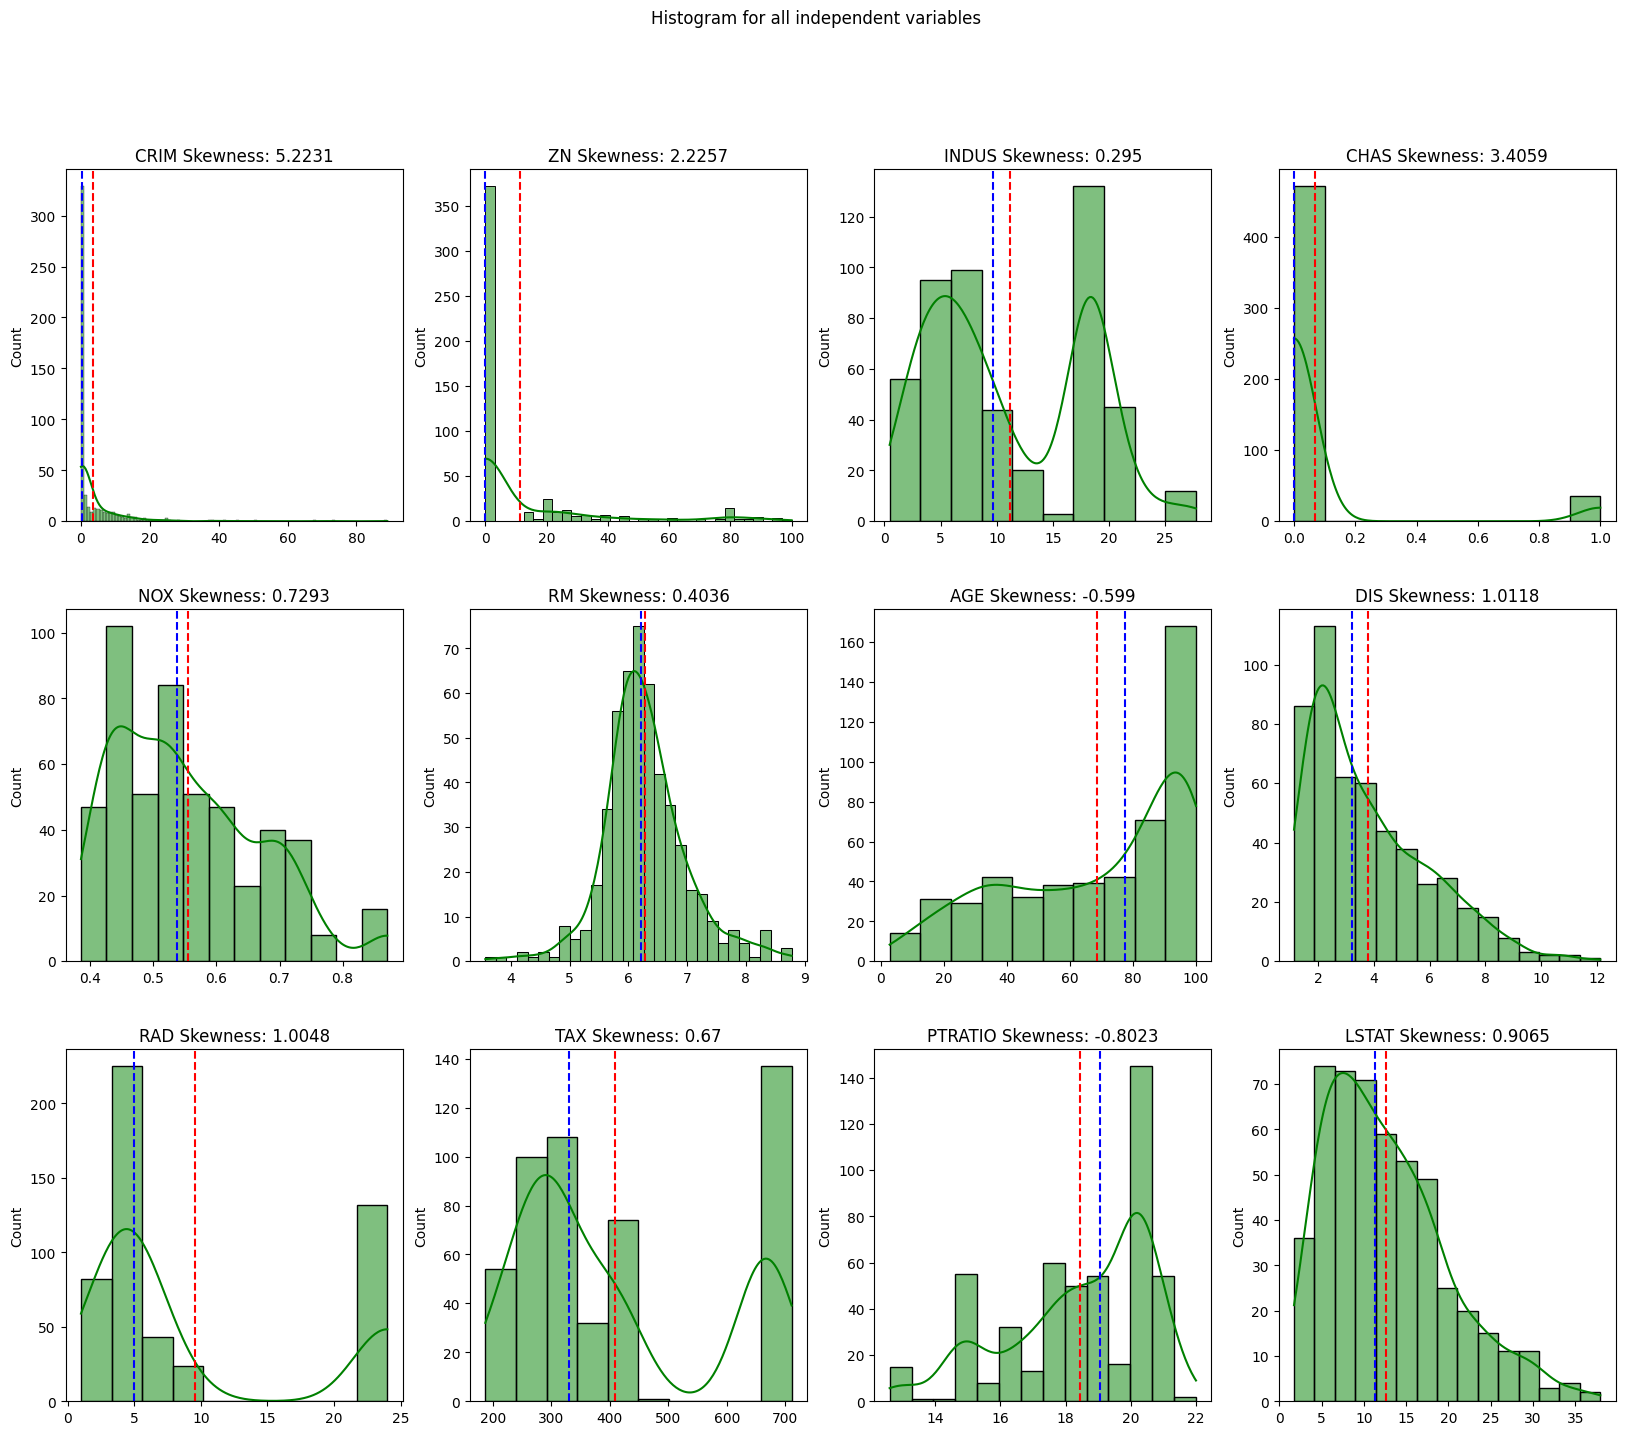

In [ ]:
# plotting histogram to observe the distribution of all feature columns
ax_row = 0
ax_col = 0

fig, ax = plt.subplots(3, 4, figsize = (20,16))
fig.subplots_adjust(hspace=0.25)
fig.suptitle("Histogram for all independent variables")

for i in df_cols:
    sns.histplot(data = df, x = i, ax = ax[ax_row, ax_col], kde = True, color = 'green')
    ax[ax_row, ax_col].axvline(np.mean(df[i]), color='r', linestyle='--') #red line showing mean
    ax[ax_row, ax_col].axvline(np.median(df[i]), color='b', linestyle='--') #blue line showing median
    skewness = i + " Skewness: " + str(np.round(df[i].skew(),4))
    ax[ax_row, ax_col].title.set_text(skewness)
    ax[ax_row, ax_col].set_xlabel("")

    if ax_col == 3:
        ax_row = ax_row + 1
        ax_col = 0
    else:
        ax_col = ax_col + 1

plt.show()


**Observations:**
- CRIM, ZN, NOX, DIS, LSTAT are all unimodal and positively skewed.
  - This means that most suburbs/towns have a low crime rate and very few suburbs/towns have a high crime rate.
  - The proportion of residential land zoned for lots over 25,000 sq.ft. is low for most of the suburbs/towns
  - Nitric Oxide concentration (parts per 10 million) is also quite low  for most suburbs/towns which is good (implying less pollution)
  - Weighted distances to five Boston employment centers from a median home of a given suburb/town is mostly low, which implies commute to workplace will be shorter
  - Percentage of lower status population is also low in most suburb/towns
- CHAS is binomial distribution. It is 1  only if tract bounds the Charles river. Since, most data points have a value of 0, majority of median homes are not bound by the river.
- INDUS, RAD and TAX have bimodal distributions and are all positively skewed.
  - This means in some suburbs/towns the proportion of non-retail business or industrial acres per town is lower proportion (first mode between 5-7) while some have a higher proportion(second mode at around 18).
  - Index of accessibility to radial highways being bimodal means that in most suburbs/towns, median homes are closer to radial highways (mode at around 5) while others are farther away (mode at around 22-24).
  - Tax rate being bimodal would mean some suburbs/towns have a low tax rate wiht a mode around 300 while others have a higher tax rate with a mode around 700.
- AGE and PTRATIO are unimodal and negatively skewed
  - With respect to AGE, it means that in some suburbs/towns the proportion of homes that are occupied by the owner and are built before 1940 is very high indicating older suburbs/towns. Newer developments would have a smaller AGE value.
  - A higher Pupil-Teacher Ratio could mean that these suburbs/towns probably have a higher population compared to those which have lower PTRATIO
- RM has an almost normal distribution, this means that most median homes of a given suburb/town have 4 to 9 rooms in our dataset.

Now, we will explore the boxplots for these to observe any outliers

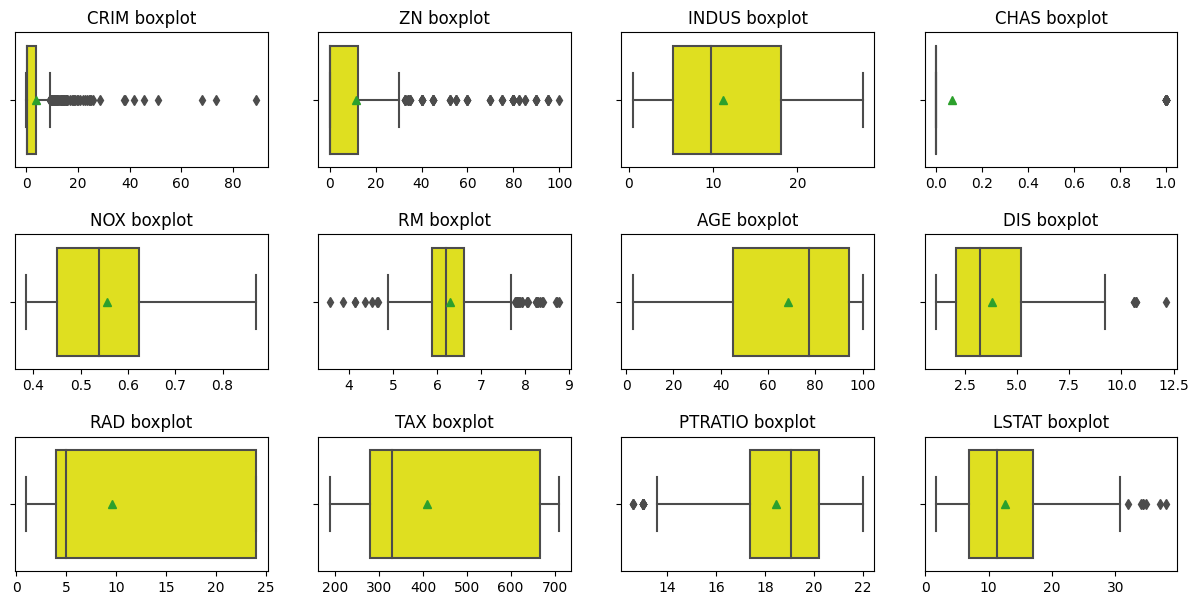

In [ ]:
# plotting boxplots to observe for possible outliers of all feature columns
ax_row = 0
ax_col = 0

fig, ax = plt.subplots(3, 4, figsize = (15,7))
fig.subplots_adjust(hspace=0.5)

for i in df_cols:
    sns.boxplot(data = df, x = i, ax = ax[ax_row, ax_col], showmeans = True, color = 'yellow')
    ax[ax_row, ax_col].title.set_text(i + " boxplot")
    ax[ax_row, ax_col].set_xlabel("")

    if ax_col == 3:
        ax_row = ax_row + 1
        ax_col = 0
    else:
        ax_col = ax_col + 1

**Observations:**
- CRIM: 75% of the values lie below ~10 which means 75% of suburbs/towns have a very low crime rate which is good for the median home value in these places. However, outliers in this case, ones that lie in suburbs/towns having higher crime rate, could have an impact on the median home value and hence we will not treat these.
- ZN: Most of the median homes in suburbs/towns are built on less than 25,000 sq. ft lot. But, there could be suburbs/towns which are very affluent and median homes are built on lots bigger than 25,000 sq. ft. In such places, the median home values will be higher. Hence, we will not treat these as outliers
- INDUS: No outliers are observed
- CHAS: Since, this is binomial distribution, no outliers are observed
- NOX: No outliers are observed
- RM: Most of the dwellings have rooms between 5 and 8. But, there could be smaller homes that have fewer than 5 rooms and bigger homes with more than 8 rooms. The number of rooms have an impact on the median home value and hence we will not treat these as outliers.
- AGE: No outliers are observed
- DIS: Most median homes are observed to be within 10 units from the 5 Boston employment centers. However, a few homes may be farther away and these may have an impact on the median home value. Hence, we will keep these outliers.
- RAD: No outliers are observed
- TAX: No outliers are observed
- PTRATIO: We observe very few outliers which have a small Pupil-Teacher Ratio. These may not have a major impact on our model since they are very close in value to the lower whisker. Hence, we will not treat them.
- LSTAT: The percentage of lower status of the population affects the median home values in a given suburb/town - a high value of LSTAT can cause lower median home prices values. We observe that there are datapoints which have a high LSTAT and we will not treat them considering the impact they can have on our target variable.

Now, we will shift our focus to understanding the distribution and other characteristics of out target variable, MEDV

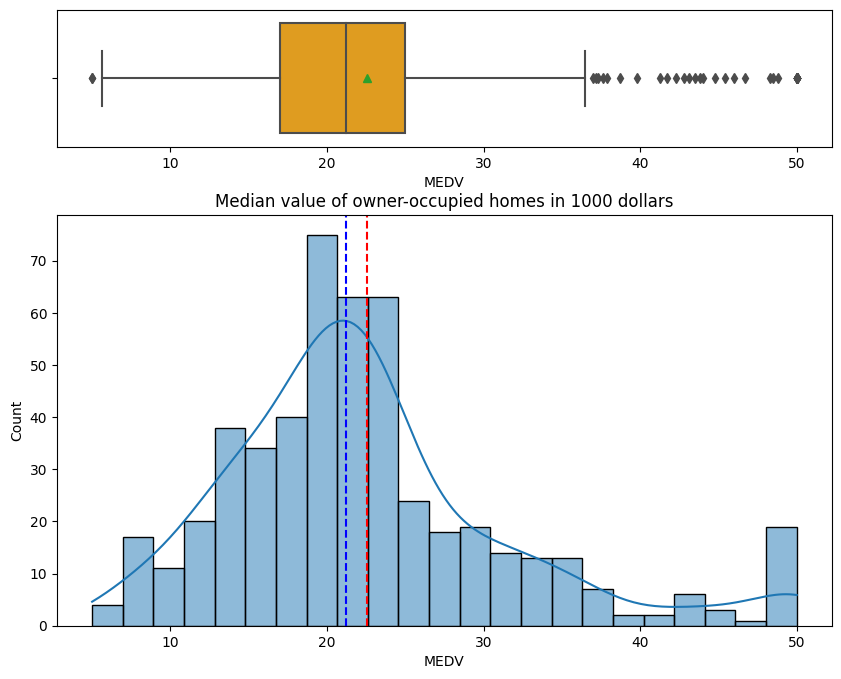

Skewness:  1.1081


In [ ]:
# analyzing the distribution of our target variable MEDV
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize = (10,8))
f.subplots_adjust(hspace=0.25)

sns.boxplot(data = df,  x='MEDV', ax = ax1, showmeans = True, color = 'orange')
sns.histplot(data = df, x ='MEDV', ax = ax2, kde = True)
plt.title('Median value of owner-occupied homes in 1000 dollars')
plt.axvline(np.mean(df['MEDV']), color='r', linestyle='--') #red line showing mean
plt.axvline(np.median(df['MEDV']), color='b', linestyle='--') #blue line showing median
plt.show()

# display skewness observed in the target
print("Skewness: ", np.round(df['MEDV'].skew(),4))

**Observations:**
- **MEDV** is our target variable
- It is unimodal and **positively skewed**.
- It has a mean of 22.53 and median of 21.2 which means that the mean of median value of home is $21200 and median is \$22532
- We can also observe that most of the home values lie between \$5,000 and \$38,000. But, there are a couple of homes that have a very low ( < \$5,000) median home value and many homes with a high (>\$38,000) median home values, in the later case indicating bigger or more affluent homes.

**Determining the correlation between variables**

Now, we will look for the correlation between the dependent variable, MEDV and different independent variables and also amongst the independent variables. We will look for the combinations that have a correlation of (>0.7) or (<-0.7) and address those individually in our bivariate analysis section. We will also look for possible correlations that are in the range (-0.7< corr < 0.7) but might give us a deeper insight into the data.

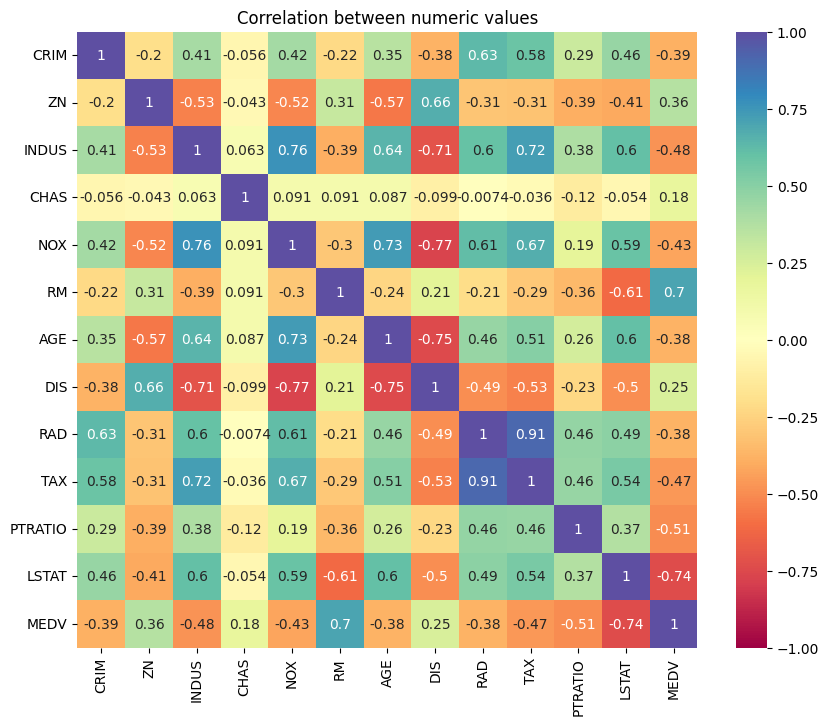

In [ ]:
# obtaining the heatmap to observe the correlation between different variables
plt.figure( figsize = (10,8))
sns.heatmap(data = df.corr(), annot = True, cmap = 'Spectral', vmin = -1, vmax = 1)
plt.title('Correlation between numeric values')
plt.show()

**Observations:**
There are many correlations that can be observed from the heatmap. These are listed below:
- Target variable MEDV and RM has a high positive correlation of 0.7
- Target variable MEDV and LSTAT has a high negative correlation of -0.74
- We also observe a high negative correlation of -0.61 between LSTAT and RM and high positive correlation of 0.6 between LSTAT and AGE
- We also observe a very high positive correlation of 0.91 between TAX and RAD and 0.72 between TAX and INDUS which is understandable
- We also observe a positive correlation between RAD and NOX (0.61) and RAD and CRIM (0.63)
- We also observe that DIS is negatively correlated to INDUS (-0.71), NOX (-0.77) and AGE (-0.75)
- AGE is positively correlated to INDUS (0.64) and NOX (0.73) and negatively correlated to ZN (-0.57)

Now, let us consider each of these pairs in our Bivariate Analysis section.

## Bivariate Analysis

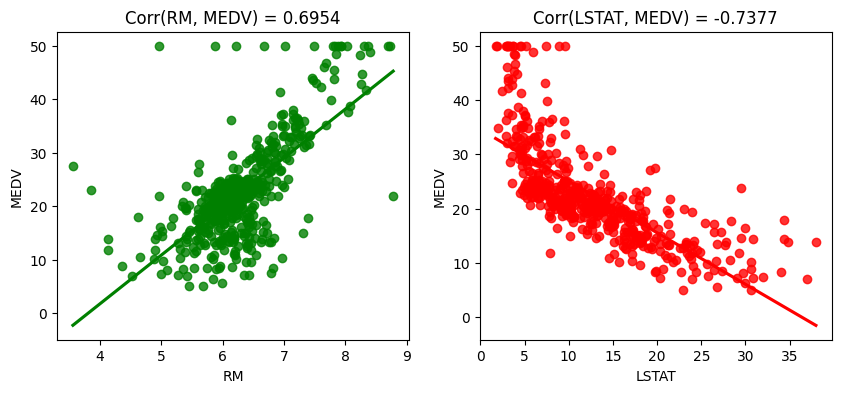

In [ ]:
# scatterplot to explore the relation between MEDV and RM, LSTAT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.subplots_adjust(hspace=0.5)

sns.regplot(data = df, ax = ax1, x = "RM", y = "MEDV", ci = False, color = 'green')
ax1.title.set_text("Corr(RM, MEDV) = " + str(np.round(df['RM'].corr(df['MEDV']), 4)))
sns.regplot(data = df, ax = ax2, x = "LSTAT", y = "MEDV", ci = False, color = 'red')
ax2.title.set_text("Corr(LSTAT, MEDV) = " + str(np.round(df['LSTAT'].corr(df['MEDV']), 4)))
plt.show()

**Observations:**
- We observe that as the number of rooms increases, the median value of the home increases as well
- Also, we observe that as the percentage of lower status of population increases, the median value of the home in that suburb/town decreases


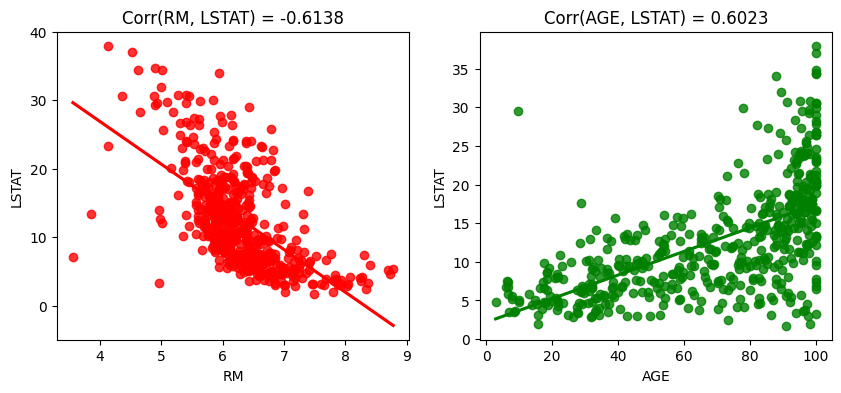

In [ ]:
# scatterplot to explore the relation between LSTAT and RM, AGE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.subplots_adjust(hspace=0.5)

sns.regplot(data = df, ax = ax1, x = "RM", y = "LSTAT", ci = False, color = 'red')
ax1.title.set_text("Corr(RM, LSTAT) = " + str(np.round(df['RM'].corr(df['LSTAT']), 4)))
sns.regplot(data = df, ax = ax2, x = "AGE", y = "LSTAT", ci = False, color = 'green')
ax2.title.set_text("Corr(AGE, LSTAT) = " + str(np.round(df['AGE'].corr(df['LSTAT']), 4)))
plt.show()

**Observations:**
- As the number of rooms in the median home of a suburb/town increases, the percentage of lower status of population in the suburb/town decreases. This is true, since more rooms implies bigger homes which might not be affordable to the lower status population
- As, the proportion of the median home occupied by the owner built before 1940s increases, the percentage of lower status population in the area decreases. This seems to be a less obvious relation but, older homes occupied by the owner would mean the population living there are mostly home owners and hence might not belong to lower status.

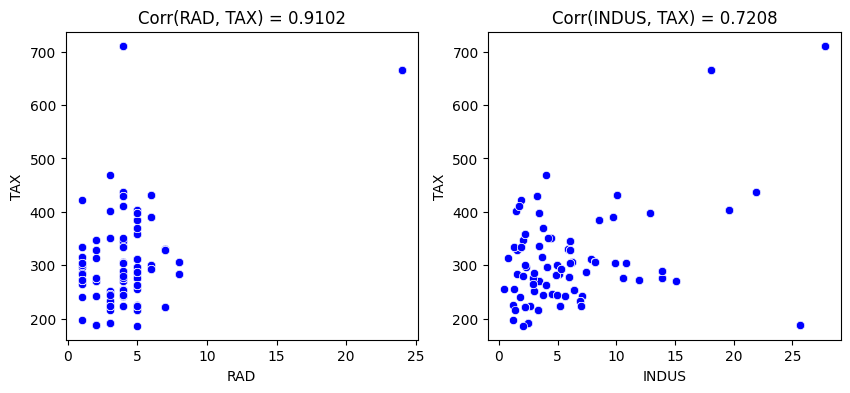

In [ ]:
# scatterplot to explore the relation between TAX and RAD, INDUS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.subplots_adjust(hspace=0.5)

sns.scatterplot(data = df, ax = ax1, x = "RAD", y = "TAX", color = 'blue')
ax1.title.set_text("Corr(RAD, TAX) = " + str(np.round(df['RAD'].corr(df['TAX']), 4)))
sns.scatterplot(data = df, ax = ax2, x = "INDUS", y = "TAX", color = 'blue')
ax2.title.set_text("Corr(INDUS, TAX) = " + str(np.round(df['INDUS'].corr(df['TAX']), 4)))
plt.show()

**Observations:**
- The correlation between RAD and TAX is a high 0.91. This would mean that as the index of accessibility to radial highways increases, tax rate increases. But, it is hard to justofy such a correlation and the scatterplot does not show any such positive correlation either. This correlation value could be because of outliers.
- Similarly, we observe the correlation between INDUS and TAX is high, 0.72, which would mean that as the proportion of non-retail business acres per town increases, tax rate increases. Such a relation could be possible but, again this could be because of the outliers

Let us check the correlation values after getting rid of the outliers.


In [ ]:
# checking the correlation between RAD and TAX
df_temp = df[df['TAX'] < 600] # filtering out the outliers

df_temp['TAX'].corr(df_temp['RAD'])

0.24975731331429218

**Observation:** We observe that the correlation between RAD and TAX dropped from 0.91 to 0.2498 after the outliers were removed. Hence we know that the high correlation between TAX and RAD is due to outliers. Let's check similarly for TAX and INDUS

In [ ]:
# checking the correlation between INDUS and TAX
df_temp = df[df['INDUS'] < 15] # filtering out the outliers

df_temp['INDUS'].corr(df_temp['TAX'])

0.25183303683420843

**Observation:** Similarly, we observe that the correlation between INDUS and TAX dropped from 0.72 to 0.2518 after the outliers were removed. Hence we know that the high correlation between TAX and RAD is due to outliers.

But, as we determined earlier, we are not treating these outliers as these may be influencing the median home prices individually.

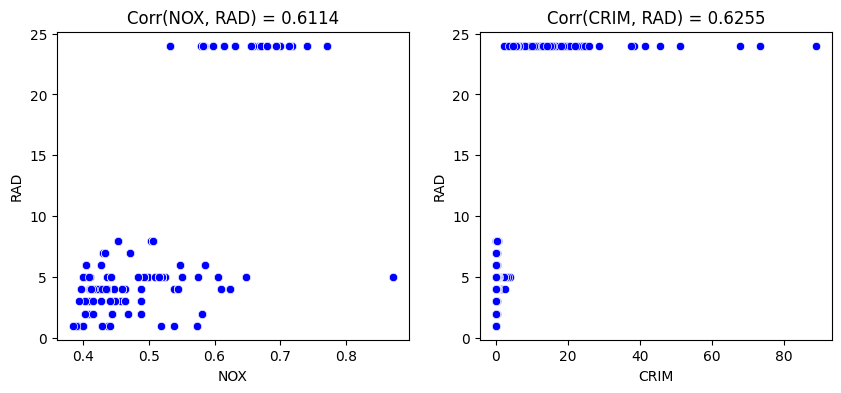

In [ ]:
# scatterplot to explore the relation between RAD and NOX, CRIM
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.subplots_adjust(hspace=0.5)

sns.scatterplot(data = df, ax = ax1, x = "NOX", y = "RAD", color = 'blue')
ax1.title.set_text("Corr(NOX, RAD) = " + str(np.round(df['NOX'].corr(df['RAD']), 4)))
sns.scatterplot(data = df, ax = ax2, x = "CRIM", y = "RAD", color = 'blue')
ax2.title.set_text("Corr(CRIM, RAD) = " + str(np.round(df['CRIM'].corr(df['RAD']), 4)))
plt.show()

**Observations:**  There doesn't seem to be any correlation between NOX and RAD or CRIM and RAD. The higher corrlation values could be due to some latent variables or relationships

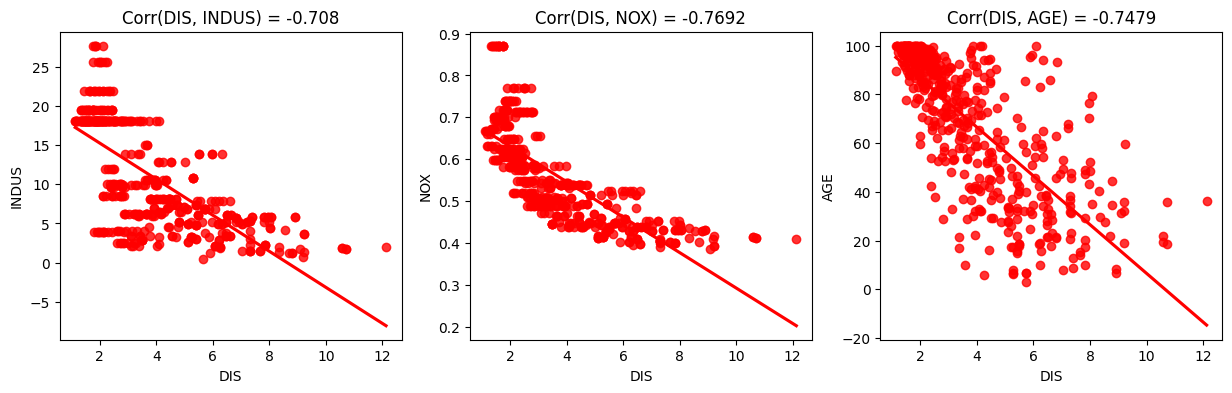

In [ ]:
# scatterplot to explore the relation between DIS and INDUS, NOX, AGE
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4))
fig.subplots_adjust(hspace=0.5)

sns.regplot(data = df, ax = ax1, x = "DIS", y = "INDUS", ci=False, color = 'red')
ax1.title.set_text("Corr(DIS, INDUS) = " + str(np.round(df['DIS'].corr(df['INDUS']), 4)))
sns.regplot(data = df, ax = ax2, x = "DIS", y = "NOX", ci=False, color = 'red')
ax2.title.set_text("Corr(DIS, NOX) = " + str(np.round(df['DIS'].corr(df['NOX']), 4)))
sns.regplot(data = df, ax = ax3, x = "DIS", y = "AGE", ci=False, color = 'red')
ax3.title.set_text("Corr(DIS, AGE) = " + str(np.round(df['DIS'].corr(df['AGE']), 4)))
plt.show()

**Observations:** We can observe a negative correlation of DIS with each of INDUS, NOX and AGE. This means:
- As weighted distances of the median homes to five Boston employment centers increases, the proportion of non-retail business acres per town decreases. It is a less obvious relationship but there could be some underlying feature resulting in such a negative correlation.
- As weighted distances of the homes to five Boston employment centers increases, the Nitrix Oxide concentration decreases. This is more interpretable because the homes will be farther away from the high traffic area where there is more pollution
- As weighted distances of the homes to five Boston employment centers increases, the percentage of owner occupied homes built before 1940 decreases. This makes sense because employment areas usually develop closer to older suburbs/towns, and later to accomodate newer incoming population searching for employment, newer homes are built further away from these employment areas.

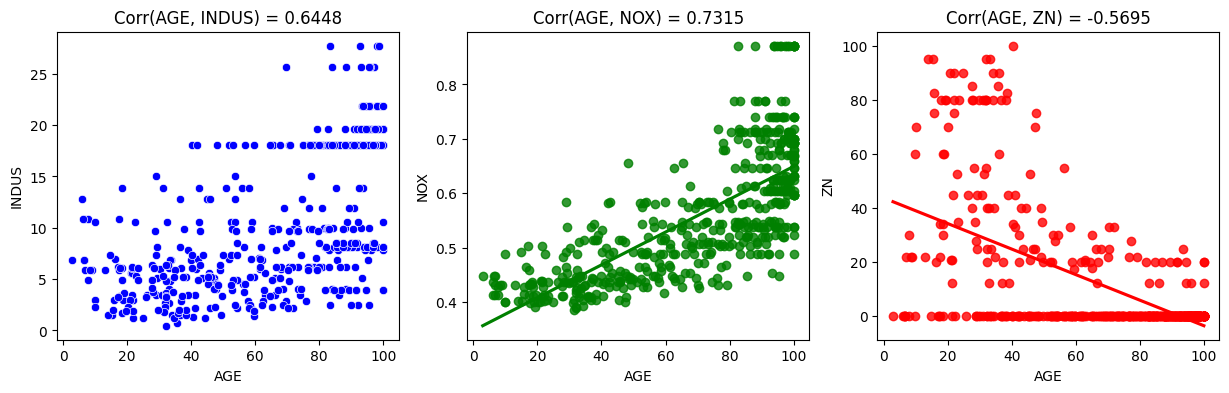

In [ ]:
# scatterplot to explore the relation between AGE and INDUS, NOX, ZN
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,4))
fig.subplots_adjust(hspace=0.5)

sns.scatterplot(data = df, ax = ax1, x = "AGE", y = "INDUS", color = 'blue')
ax1.title.set_text("Corr(AGE, INDUS) = " + str(np.round(df['AGE'].corr(df['INDUS']), 4)))
sns.regplot(data = df, ax = ax2, x = "AGE", y = "NOX", ci = None, color = 'green')
ax2.title.set_text("Corr(AGE, NOX) = " + str(np.round(df['AGE'].corr(df['NOX']), 4)))
sns.regplot(data = df, ax = ax3, x = "AGE", y = "ZN", ci = None, color = 'red')
ax3.title.set_text("Corr(AGE, ZN) = " + str(np.round(df['AGE'].corr(df['ZN']), 4)))
plt.show()

**Observations:**
- There isn't a visible correlation between AGE and INDUS eventhough the correlation value is high. This could be because of some latent relation. A higher proportion of owner occupied homes built before 1940s may not mean a higher proportion of non-retail businesses in the suburb/town.
- As the proportion of owner occupied homes built before 1940s increases, the Nitric Oxide concentration increases. This is understandable because older homes might not have a clean energy source for heating and some may be still depending on traditional fossil fuel based heating like a fireplace.
- As the proportion of owner occupied homes built before 1940s increases, the proportion of residential land zoned for lots over 25,000 sq.ft. decreases. Again, there could be underlying latent features causing this as there is no obvious relation here.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Step 1: Checking for missing values**

In [ ]:
# check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

We do not observe any missing values in our dataset. Hence, we do not need to treat it.

**Step 2: Logarithmic transformation of dependent variable**

We observed in the histogram of MEDV that the dependent variable is positively skewed. In order to attain normal distribution and hence linear relation with the independent variables, we do log transformation of the target variable

In [ ]:
# log transformation of 'MEDV'
df['MEDV_ln'] = np.log(df['MEDV'])

**Step 3: Seperating the dependent and independent variables**

We will also add constant intercept term to our X

In [ ]:
# seperating dependent variable MEDV_ln into Y
Y = df['MEDV_ln']

# seperating independent variables into X
X = df.drop(columns = ['MEDV', 'MEDV_ln'])

# adding the intercept term
X = sm.add_constant(X)

**Step 4: Splitting dataset into train and test set (70:30)**

In [ ]:
# splitting X and Y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 30, random_state = 13)

**Step 5: Checking for Multicollinearity**

We will check for multicollinearity in training set by obtaining the Variance Inflation Index. We will drop the variables who have VIF > 5 until all variables have a VIF < 5

In [ ]:
# defining a function to check VIF score to check multicollinearity
def check_vif(train_df):
    vif_df = pd.DataFrame()
    vif_df['Feature'] = train_df.columns

    #determine vif for each feature
    vif_df["VIF"] = [variance_inflation_factor(train_df.values, i) for i in range(len(train_df.columns))]

    return vif_df

# determine VIF score for our train dataset
check_vif(X_train)

,Feature,VIF
0,const,527.215854
1,CRIM,1.729032
2,ZN,2.262345
3,INDUS,3.831353
4,CHAS,1.064000
5,NOX,4.537426
6,RM,1.889506
7,AGE,3.072847
8,DIS,3.949732
9,RAD,7.479017


**Observation:** We observe a VIF score of more than 5 in two variables - TAX and RAD. Since, TAX has the highest VIF score, we will first drop TAX and check VIF scores and see if we observe any changes or if we still need to drop RAD

In [ ]:
# dropping TAX from X_train and X_test
X_train = X_train.drop(['TAX'], axis = 1)
X_test = X_test.drop(['TAX'], axis = 1)

# checking changes in VIF score
check_vif(X_train)

,Feature,VIF
0,const,521.480506
1,CRIM,1.728975
2,ZN,2.174109
3,INDUS,3.155171
4,CHAS,1.047965
5,NOX,4.504378
6,RM,1.879452
7,AGE,3.069636
8,DIS,3.943818
9,RAD,2.754625


Now, all the variables have a VIF score < 5. We do not need to drop any other variable. We will now build the model with the X_train

## Model Building - Linear Regression

We will now build the linear model using OLS function from the statsmodel.api module

In [ ]:
#building model using OLS
lmodel1 = sm.OLS(y_train, X_train).fit()

#obtaining model summary
lmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MEDV_ln   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          3.08e-146
Time:                        20:46:23   Log-Likelihood:                 112.00
No. Observations:                 476   AIC:                            -200.0
Df Residuals:                     464   BIC:                            -150.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1907      0.203     20.671      0.000       3.792       4.589
CRIM          -0.0108      0.001     -8.063      0.000      -0.013      -0.008
ZN             0.0007      0.001      1.330      0.184      -0.000       0.002
INDUS         -0.0021      0.002     -0.925      0.356      -0.007       0.002
CHAS           0.1291      0.037      3.453      0.001       0.056       0.203
NOX           -0.8234      0.165     -4.977      0.000      -1.148      -0.498
RM             0.0921      0.017      5.313      0.000       0.058       0.126
AGE            0.0002      0.001      0.368      0.713      -0.001       0.001
DIS           -0.0508      0.008     -6.053      0.000      -0.067      -0.034
RAD            0.0041      0.002      2.368      0.018       0.001       0.007
PTRATIO       -0.0380      0.005     -6.977      0.000      -0.049      -0.027
LSTAT         -0.0310      0.002    -14.581      0.000      -0.035      -0.027
==============================================================================
Omnibus:                       43.305   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.086
Skew:                           0.345   Prob(JB):                     1.15e-32
Kurtosis:                       5.634   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will now  drop insignificant variables (variables with p-value > 0.05): ZN, INDUS and AGE from the above model and build the model again

In [ ]:
# dropping ZN, INDUS and AGE from the train and test dataset and build the model again
X_train = X_train.drop(['ZN', 'INDUS', 'AGE'], axis = 1)
X_test = X_test.drop(['ZN', 'INDUS', 'AGE'], axis = 1)

#building model using OLS
lmodel2 = sm.OLS(y_train, X_train).fit()

#obtaining model summary
lmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MEDV_ln   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          4.26e-149
Time:                        20:46:23   Log-Likelihood:                 110.62
No. Observations:                 476   AIC:                            -203.2
Df Residuals:                     467   BIC:                            -165.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2026      0.202     20.815      0.000       3.806       4.599
CRIM          -0.0106      0.001     -7.950      0.000      -0.013      -0.008
CHAS           0.1265      0.037      3.401      0.001       0.053       0.200
NOX           -0.8684      0.149     -5.838      0.000      -1.161      -0.576
RM             0.0985      0.017      5.899      0.000       0.066       0.131
DIS           -0.0449      0.007     -6.628      0.000      -0.058      -0.032
RAD            0.0041      0.002      2.423      0.016       0.001       0.007
PTRATIO       -0.0409      0.005     -8.062      0.000      -0.051      -0.031
LSTAT         -0.0309      0.002    -15.462      0.000      -0.035      -0.027
==============================================================================
Omnibus:                       44.527   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.248
Skew:                           0.361   Prob(JB):                     1.43e-33
Kurtosis:                       5.666   Cond. No.                         681.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:** Now all the variables have a p-value less than 0.05. Hence, we can proceed with this model.

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

We will now try determing how the model is performing by checking Rsquared, RMSE, MAE and MAPE on the training and test set

In [ ]:
# import libraries needed for determining metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# determining y_hat_train and y_hat_test
y_hat_train = lmodel2.predict(X_train)
y_hat_test = lmodel2.predict(X_test)

# dataframe of performance matrices
model_perform = pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "Rsquared": [
                    r2_score(y_train, y_hat_train),
                    r2_score(y_test, y_hat_test),
                ],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_train, y_hat_train)),
                    np.sqrt(mean_squared_error(y_test, y_hat_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_train, y_hat_train),
                    mean_absolute_error(y_test, y_hat_test),
                ],
                "MAPE": [
                    mean_absolute_percentage_error(y_train, y_hat_train),
                    mean_absolute_percentage_error(y_test, y_hat_test),
                ]

            }
        )

model_perform

,Data,Rsquared,RMSE,MAE,MAPE
0,Train,0.781825,0.191795,0.138379,0.048265
1,Test,0.605823,0.228103,0.173797,0.059282


**Observations:**
- **Rsquared:**
  - Our Rsquared for training set is 0.7818 which means a significant amount (78.18%) of variance in our target variable, MEDV is explained by our independent variables used for by the model.
  - Rsquared for test set is 0.6058 which means a good amount of variance (60.58%) in our target variable, MEDV is explained by our independent variables used for by the model.
- **RMSE:** Our model has a RMSE of 0.1918 on our training set and 0.2281 on our test set. Hence, we can conclude that our model fits better on the training set than the test set, but might not be overfitting.
- **MAE:** The closer the value of MAE is to 0, the more accurate the model is. Since MAE is 0.1384 for our training set and 0.1738 for our test set, our model is more accurately predicting on the training set than the test set.
- **MAPE:** This gives us the absolute percentage difference between our predicted and intended target values. MAPE is 4.83% on the training set and 5.93% on the test set which means our predictions are very close to the target

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

The following are the assumptions of linear regression:
1. Mean of residuals should be 0
2. No Heteroscedasticity
3. Linearity of variables
4. Normality of error terms

**1. First we will check if the mean of residuals is 0**

In [ ]:
residuals = lmodel2.resid
np.mean(residuals)

-1.9816081548771702e-15

**Observations:** The mean value of the residuals is very small and very close to zero. Hence, condition is satisfied.

**2. No heteroscedasticity is observed in the residuals**

To confirm this, we will use Goldfeldquandt Test to test the hypothesis with alpha = 0.05:
- Null hypothesis: Residuals are homoscedastic
- Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
# importing the required libraries for the goldfeldquandt Test
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#checking for the p value and f stat
stat_name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(stat_name, test)

[('F statistic', 1.0183985567636713), ('p-value', 0.44520171730554675)]

**Observations:** Since the p-value is 0.4452 which is more than 0.05, we fail to reject the null hypothesis. Hence, we can conclude that residuals are homoscedastic

**3. Linearity of variables**

We need to check that the independent variables have a linear relation with the dependent variable. To test this, we will plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern.

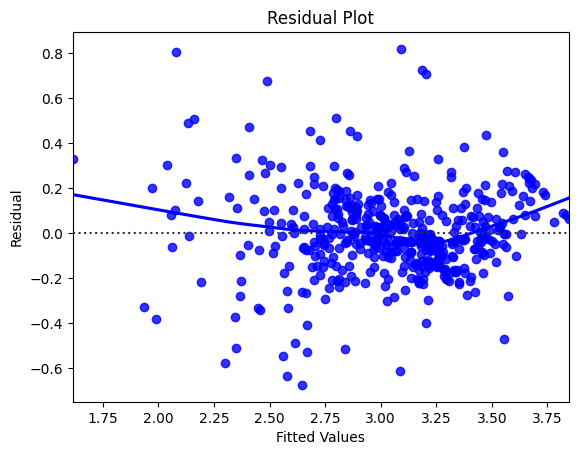

In [ ]:
# determining predicted values
fitted_values = lmodel2.fittedvalues

# plotting the predicted values
sns.residplot(x = fitted_values, y = residuals, color = "blue", lowess = True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

**Observations:** We observe that the residplot is a random scatter and no particular pattern can be observed. Also, the lowess line is nearly horizontal. Thus, we can conclude the linearity of the variables.

**4. Normality of error terms**

We will check if the residuals are normally distributed by plotting the residuals in a histogram and a q-q plot

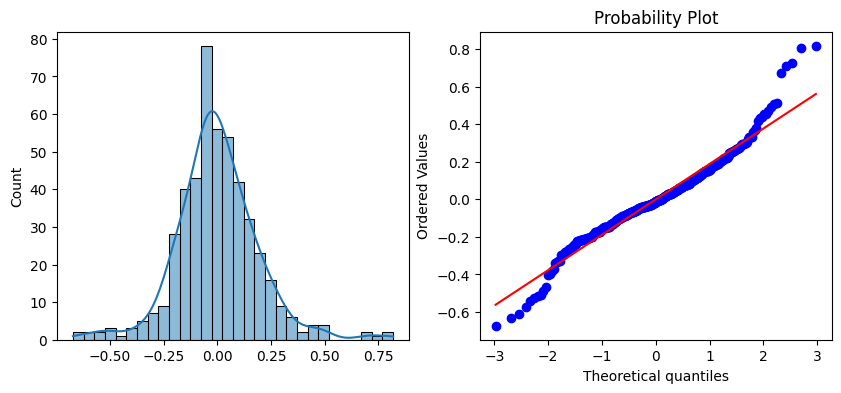

In [ ]:
# libraries for q-q plot
import pylab
import scipy.stats as stats

# residual histogram and q-q plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.subplots_adjust(hspace=0.5)

sns.histplot(residuals, ax = ax1, kde = True)
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

**Observations:** We can clearly observe from the above plots - histogram as well as the q-q plot - that the residuals are normally distributed

## Final Model

Now that we have confirmed that all the requirements for the linear model are met, we can build a final model and check its performance.

We will use cross validation on our training dataset to build our model. But, to determine what number of folds work the best, we will first try with different values for number of splits.

In [ ]:
# importing required libraries to build final model using cross validation
from sklearn.model_selection import cross_val_score, KFold

# using append to add rows to the dataframe throws future warnings as it is deprecated
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# creating a model for applying cross validation
final_lmodel1 = LinearRegression()

# create empty dataframe to store the metrics obtained from cross validation
scores = pd.DataFrame(columns=['n_splits', 'r2', 'rmse', 'mape', 'mae'])

# trying cross validation method for different n_splits
for i in range(5, 51, 5):
    cv = KFold(n_splits = i, shuffle=True, random_state=13)
    new_row = [{ 'n_splits' : i,
                'r2' : np.mean(cross_val_score(final_lmodel1, X_train, y_train, cv = cv)),
                'rmse' : np.mean(np.sqrt(-(cross_val_score(final_lmodel1, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error')))),
                'mape' : -np.mean((cross_val_score(final_lmodel1, X_train, y_train, cv = cv, scoring = 'neg_mean_absolute_percentage_error'))),
                'mae' : -np.mean((cross_val_score(final_lmodel1, X_train, y_train, cv = cv, scoring = 'neg_mean_absolute_error')))
    }]
    scores = scores.append(pd.DataFrame(new_row), ignore_index=True)

scores

,n_splits,r2,rmse,mape,mae
0,5,0.757596,0.200144,0.049867,0.143013
1,10,0.762112,0.195597,0.049240,0.141175
2,15,0.752205,0.194766,0.049454,0.141726
3,20,0.729474,0.193206,0.049487,0.141710
4,25,0.736038,0.192336,0.049420,0.141528
5,30,0.735635,0.190655,0.049354,0.141309
6,35,0.739231,0.187143,0.049534,0.141818
7,40,0.721217,0.188392,0.049507,0.141760
8,45,0.674073,0.187705,0.049650,0.142101
9,50,0.646898,0.186365,0.049492,0.141679


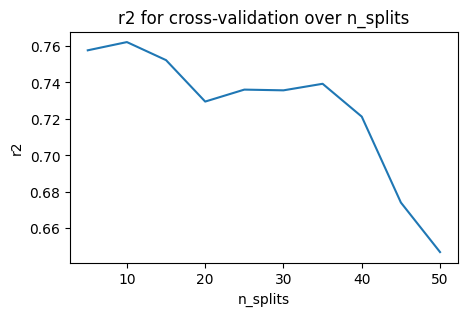

In [ ]:
# plotting r2 at different number of splits
plt.figure(figsize = (5,3))
sns.lineplot(x = scores['n_splits'], y = scores['r2'])
plt.title("r2 for cross-validation over n_splits")
plt.show()

**Observation:** We can observe that our cross validation performs best at n_splits = 10. Hence, we will use this for our model.

In [ ]:
# importing required libraries to build final model using cross validation
from sklearn.model_selection import cross_val_score

# creating a model for applying cross validation
final_lmodel = LinearRegression()

cv = KFold(n_splits = 10, shuffle=True, random_state=13)

# checking cross validation scores for the model
cv_r2 = cross_val_score(final_lmodel, X_train, y_train, cv = cv)
cv_rmse = np.sqrt(-(cross_val_score(final_lmodel, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error')))
cv_mape = -(cross_val_score(final_lmodel, X_train, y_train, cv = cv, scoring = 'neg_mean_absolute_percentage_error'))
cv_mae = -(cross_val_score(final_lmodel, X_train, y_train, cv = cv, scoring = 'neg_mean_absolute_error'))

cv_scores = pd.DataFrame(
    {
        'Score' : ['RSquared', 'RMSE', 'MAPE', 'MAE'],
        'Mean': [np.mean(cv_r2), np.mean(cv_rmse), np.mean(cv_mape), np.mean(cv_mae)],
        'Std. Dev (+/-)': [np.std(cv_r2), np.std(cv_rmse), np.std(cv_mape), np.std(cv_mae)]
})

cv_scores

,Score,Mean,Std. Dev (+/-)
0,RSquared,0.762112,0.046417
1,RMSE,0.195597,0.026378
2,MAPE,0.049240,0.007543
3,MAE,0.141175,0.017799


**Observations:**
- **RSquared:** Our final linear model has an RSquared of 0.7621 and a standard deviation of +/-0.0464. This means that our model explains on an average about 76.21% of variance in our data with a standard deviation of +/- 4.64%. This is comparable to the base model we obtained earlier
- **RMSE:** Our final model has RMSE of 0.1955 with a standard deviation of +/- 0.0264. This means 95% of the time, RMSE for our model will lie between 0.1427 and 0.2483 (mean +/- 2*std)
- **MAPE:** Our final model has MAPE of 4.92% with a standard deviation of +/- 0.75%. This means 95% of the time, MAPE for our model will lie between 3.42% and 6.42% (mean +/- 2*std)
- **MAE:** Our final model has MAE of 0.1412 with a standard deviation of +/- 0.0178. This means 95% of the time, MAE for our model will lie between 0.1056 and 0.1768 (mean +/- 2*std)

All these values are comparable to the lmodel2 which is our base model. Hence, our model is just the right fit and giving us a generalized performance.

Now that our model is built and validated, we can now make predictions on the test data.

In [ ]:
# Target MEDV has been log transformed and
# hence our predictions will be in logarithmic form
test_predictions = lmodel2.predict(X_test)

# We are converting the log scale predictions to its original scale
test_predictions_inversed = np.exp(test_predictions)

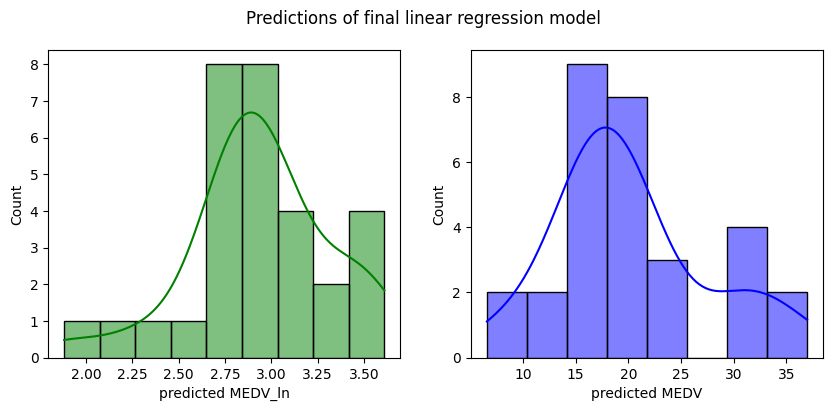

In [ ]:
#plotting histograms of the log predictions and transformed predictions
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.suptitle("Predictions of final linear regression model")
sns.histplot(data = test_predictions, ax = ax1, kde = True, color = 'green')
sns.histplot(data = test_predictions_inversed, ax = ax2, kde = True, color = 'blue')
ax1.set_xlabel('predicted MEDV_ln')
ax2.set_xlabel('predicted MEDV')
plt.show()

Now that we have obtained the test predictions of our model, we can plot them along with the actual values for the test set and check how they appear.

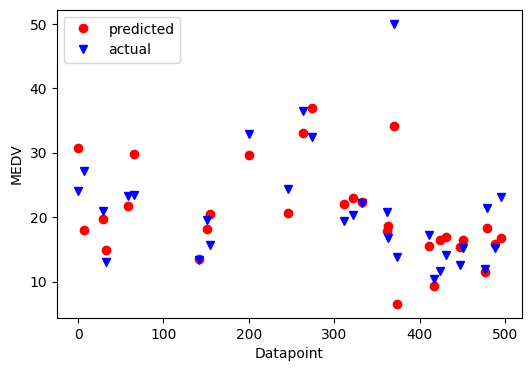

In [ ]:
# plotting the predictions and actual values on the same plot
plt.figure(figsize = (6,4))
plt.plot(test_predictions_inversed, 'ro', label='predicted')
plt.plot(np.exp(y_test), 'bv', label='actual')
plt.xlabel('Datapoint')
plt.ylabel("MEDV")
plt.legend()
plt.show()

**Observations:** We can observe from the plot above that our predicted values are close to the actual values most of the time. However, there is one value where the predicted value is around \$33,000 whereas the actual value is $50,000. This is our outlier record.

Now, that we have our final model ready and prediction done, let us get the coefficients and determine the linear relationship. We need to remember here that our model is built for the logarithm of our target variable, MEDV

In [ ]:
# obtaining the coefficients of our model
coeff_df = pd.DataFrame({'Feature' : lmodel2.params.index, 'Coefs' : lmodel2.params.values})
coeff_df

,Feature,Coefs
0,const,4.202643
1,CRIM,-0.010620
2,CHAS,0.126483
3,NOX,-0.868389
4,RM,0.098463
5,DIS,-0.044947
6,RAD,0.004059
7,PTRATIO,-0.040900
8,LSTAT,-0.030860


The linear equation of our model can be written as:

### log(MEDV) = 4.2026 - 0.0106 * CRIM + 0.1265 * CHAS - 0.8684 * NOX + 0.0985 * RM - 0.0449 * DIS + 0.0041 * RAD - 0.0409 * PTRATIO - 0.0309 * LSTAT

OR

### MEDV = exp(4.2026 - 0.0106 * CRIM + 0.1265 * CHAS - 0.8684 * NOX + 0.0985 * RM - 0.0449 * DIS + 0.0041 * RAD - 0.0409 * PTRATIO - 0.0309 * LSTAT)

**Summary:**
- We first did a basic data exploration to learn more about our dataset, followed by univariate and bivariate analysis.
- We realizeed that our target variable MEDV is not normally distributed and hence had to transform it to a logarithmic scale.
-We next did some data preprocessing, looked for missing values and found none. We split out dataset into features, X matrix and target variable Y vector (we used the MEDV_ln for this). We did a 70-30 train-test split. We dropped the column TAX because it had a high VIF score.
- We iteratively started building our OLS model and checked for p-value. We dropped the columns ZN, INDUS, AGE because it had a p-value > 0.05
- Once we obtained a satisfactory linear model, we explored its metrics to check its performance. Next we checked if this model meets the requirements of linearity.
- After confirming this, we built our final model using cross-validation and obtained the linear relationship displayed above

## **Actionable Insights and Recommendations**

### **Insights:**

- NOX (Nitric Oxide concentration) seems to have a huge impact on the Median Home Value. Bigger the value of NOX, smaller the Median Home Value. This means that median homes in suburbs/towns where pollution is higher are priced lower compared to median homes in suburb/towns with cleaner air. Take away here is stay away from industrial areas where pollution is usually high.
- CHAS which is a binomial distribution positively affects the Median Home Value. If the home is bound by the River Charles tract, then the homes have higher value compared to homes that are not bound by the river. However, one must also take into consideration the possibility of such homes being subject to natural calamaties due to flooding which may require the owner to be financially equipped to deal with it.
- We can observe that as the number of rooms (RM) increases, the median home value increases. Bigger homes tend to be pricier. The owner has to consider his financial ability when determining the number of rooms he/she desires in the Median Home he/she plans to buy.
- Smaller the distance (DIS) from the five Bostom employment centers, the higher the median home value is. People tend to like keeping their commute to work to a minimum, in order to avoid too much travel time. Hence, the demand for homes closer to the five Boston employment centers will be higher driving the prices for the same higher.
- Pupil-Teacher Ratio (PTRATIO) negatively affects the Median Home Value. Suburbs/Towns where the ratio is lower tend to have higher prices for the median homes. This could be because it is desirable to all parents to have their children attending schools where this ratio is lower, allowing more individual attention towards their children. Hence, demand for homes in such suburbs/towns is also higher driving up the median home values.
- Higher proportion of lower status population (LSTAT) drives the prices lower. This may seem discriminatory, but, is basic human nature to look for homes in areas where there is lower proportion of lower status population with a desire of having better comforts.
- As the crime rate (CRIM) in a given suburb/town increases, the median home value decreases. People like to find suburbs/towns where the crime rate is lower and safety is higher. Hence, the demand in such areas for homes is also higher keeping the median home values high.
- Higher Index of accesibility to radial highways (RAD) drives the median home value higher. Again, this may be because the travel from home to places of work and retail centers becomes much easier.

### **Recommendations:**
We have built a basic linear regression model, which works well. But, it is always advisable to explore if other models fit better and compare the performances of each model to conclude which one is the best. With this in mind, I will explore the possibility of improved performance using the following regularization techniques below:
1. Ridge Regression
2. Lasso Regression
3. Elasticnet Regression (combination of Ridge and Lasso)

Other models that could be explored in case of regression are:
1. Ensemble models such as
  - Decision Tress
  - Random Forest
  - Boosted Trees such as AdaBoost, XGBoost and LightGBM
2. Neural Network model for non-linear regression

# **(OPTIONAL) Regularization models**

We can now explore the possibility of improving our model using Ridge, Lasso and ElasticNet which is a combination of both Ridge and Lasso regularizations.

But first, we will create a common function to gather the model performance metrics. Then we can try each model and compare the performances at the end.

In [ ]:
# function to record performance metrics for all models
# import function to determine various metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Determining RMSE
def rmse(y_obs, y_hat):
    return np.sqrt(mean_squared_error(y_obs, y_hat))

# Determining MAPE
def mape(y_obs, y_hat):
    return mean_absolute_percentage_error(y_obs, y_hat) * 100

# Determining MAE
def mae(y_obs, y_hat):
    return mean_absolute_error(y_obs, y_hat)

# Determining R2
def rsquared(y_obs, y_hat):
    return r2_score(y_obs, y_hat)

def try_model(model, model_name):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_obs_train = y_train

    y_hat_test = model.predict(X_test)
    y_obs_test = y_test

    perf_metrics = {
                    'Model': model_name,
                    'R2_train': rsquared(y_obs_train, y_hat_train),
                    'R2_test': rsquared(y_obs_test, y_hat_test),
                    'RMSE_train': rmse(y_obs_train, y_hat_train),
                    'RMSE_test': rmse(y_obs_test, y_hat_test),
                    'MAPE_train': mape(y_obs_train, y_hat_train),
                    'MAPE_test': mape(y_obs_test, y_hat_test),
                    'MAE_train': mae(y_obs_train, y_hat_train),
                    'MAE_test': mae(y_obs_test, y_hat_test)
    }

    return perf_metrics

Now, that our function is ready, we will first record the performance metrics of our base model

In [ ]:
# creating a dataframe to store the metrics to compare at the end
# since we already have our linear regression model ready, we will add the metrics of the same to the dataframe
model_scores = pd.DataFrame(columns = ['Model', 'R2_train','R2_test', 'RMSE_train', 'RMSE_test', 'MAPE_train', 'MAPE_test', 'MAE_train', 'MAE_test'])
model_scores = model_scores.append(try_model(final_lmodel, 'Linear Regression'), ignore_index = True)

# examining the performance of linear model again
model_scores

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test,MAE_train,MAE_test
0,Linear Regression,0.781825,0.605823,0.191795,0.228103,4.826516,5.928189,0.138379,0.173797


**Linear model:** We can observe that the Linear model performs well with the training set but not as well with the test set. We tried using cross validation but this is the best the linear model could achieve.

Now, we will build the Ridge Regression (l2 regularization) model and compare its performance with that of LinearRegression model. So, first we will use RidgeCV function that implements ridge regression with built-in cross-validation of the alpha parameter and works similar to GridSearchCV to determine the optimum alpha value. Once, we obtain the optimum value for alpha, we will use the same to obtain Ridge Regression model.

In [ ]:
# importing necessary libraries
from sklearn.linear_model import Ridge, RidgeCV

# first we will use the RidgeCV Regressor ro determine the best alpa and
# then us this alpha to build our Ridge Regressor model
# building the RidgeCV Regressor to determine best alpha
ridgecv_model = RidgeCV(alphas=[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv = 10)
ridgecv_model.fit(X_train, y_train)

# building Ridge Regression model on our dataset
ridge_model = Ridge(alpha = ridgecv_model.alpha_, solver ='auto', random_state = 13)
model_scores = model_scores.append(try_model(ridge_model, 'Ridge Regression'), ignore_index = True)

# examining the performance of linear model with ridge regularization scores
model_scores

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test,MAE_train,MAE_test
0,Linear Regression,0.781825,0.605823,0.191795,0.228103,4.826516,5.928189,0.138379,0.173797
1,Ridge Regression,0.781825,0.605823,0.191795,0.228103,4.826516,5.928189,0.138379,0.173797


**Ridge Regularization Model:** It is very interesting to observe that Ridge Regularization obtains exactly the same results as our linear base model.

Now, we will build the Lasso Regression (l1 regularization) model. Just as we did earlier, first we will use LassoCV function that implements lasso regression with built-in cross-validation of the alpha parameter to determine the optimum alpha value. Once, we obtain the optimum value for alpha, we will use the same to obtain Lasso Regression model.


In [ ]:
# importing necessary libraries
from sklearn.linear_model import Lasso, LassoCV

# Just like in Ridge, we will first determine best alpha using LassoCV
# and then build our Lasso model using that alpha
lassocv_model = LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100], cv = 10)
lassocv_model.fit(X_train, y_train)

# building Ridge Regression model on our dataset
lasso_model = Lasso(alpha = lassocv_model.alpha_, random_state = 13)
model_scores = model_scores.append(try_model(lasso_model, 'Lasso Regression'), ignore_index = True)

# examining the performance of linear model with lasso regularization scores
model_scores

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test,MAE_train,MAE_test
0,Linear Regression,0.781825,0.605823,0.191795,0.228103,4.826516,5.928189,0.138379,0.173797
1,Ridge Regression,0.781825,0.605823,0.191795,0.228103,4.826516,5.928189,0.138379,0.173797
2,Lasso Regression,0.781806,0.604492,0.191804,0.228488,4.823400,5.936904,0.138280,0.173978


**Lasso Regularization:** We can observe that Base linear model and Ridge regularized model slightly outperform the Lasso regularized model. But, the difference is really very small.

Finally, we will try ElasticNet model which uses a combination of Ridge and Lasso regularization. We will use GridSearchCV to find the best combination of alpha and l1_ratio and see if we are able to obtain a better model..

In [ ]:
# building elasticnet regressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# first we will try to determine the best combination of hyperparameters (alpha and l1_ratio)
parameters = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
elasticnet_regressor = ElasticNet()
grid_search = GridSearchCV(elasticnet_regressor, parameters, cv=10)
grid_search.fit(X_train, y_train)

# using the best result of GridSearchCV to build elasticnet regressor
elasticnet_model = ElasticNet(random_state=13, **grid_search.best_params_)
model_scores = model_scores.append(try_model(elasticnet_model, 'ElasticNet Regression'), ignore_index = True)

# examining the performance of linear model with lasso regularization scores
model_scores

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test,MAE_train,MAE_test
0,Linear Regression,0.781825,0.605823,0.191795,0.228103,4.826516,5.928189,0.138379,0.173797
1,Ridge Regression,0.781825,0.605823,0.191795,0.228103,4.826516,5.928189,0.138379,0.173797
2,Lasso Regression,0.781806,0.604492,0.191804,0.228488,4.823400,5.936904,0.138280,0.173978
3,ElasticNet Regression,0.781825,0.605811,0.191795,0.228107,4.826482,5.928303,0.138378,0.173800


**ElasticNet model:** We can observe that even ElasticNet model is not outperforming our base linear model



**To summarize**, after trying different regularization techniques and hyperparameter tuning, we still found that our simplistic **base linear regression model performs the best**. This brings us to the significance of ***Occam's razor*** or the ***law of parsimony*** in data science and machine learning which states that the simplest explanation is usually the best one!

___